In [139]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_clin = pd.merge(clinical_data, mouse_data, on='Mouse ID')

# Display the data table for preview
mouse_clin.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [100]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumorGrp = mouse_clin.groupby(['Drug', 'Timepoint'])
tumorVol = tumorGrp.mean()
tumorVol = tumorVol.reset_index()
del tumorVol['Metastatic Sites']

# Convert to DataFrame
tumorVol = pd.DataFrame(tumorVol)

# Preview DataFrame
tumorVol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [101]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorErr = tumorGrp.sem()
tumorErr = tumorErr.reset_index()
del tumorErr['Metastatic Sites']
del tumorErr['Mouse ID']

# Convert to DataFrame
tumorErr = pd.DataFrame(tumorErr)

# Preview DataFrame
tumorErr.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [107]:
# Minor Data Munging to Re-Format the Data Frames
tumorVolTab = pd.pivot_table( tumorVol,
                                  index = tumorVol['Timepoint'], 
                                  columns = ['Drug'], 
                                   values = ['Tumor Volume (mm3)'] )
tumorVolTab.columns = tumorVolTab.columns.droplevel()
tumorVolTab = tumorVolTab.reset_index()
tumorVolErrTab = pd.pivot_table( tumorErr,
                                  index = tumorErr['Timepoint'], 
                                  columns = ['Drug'], 
                                   values = ['Tumor Volume (mm3)'] )
tumorVolErrTab.columns = tumorVolErrTab.columns.droplevel()
tumorVolErrTab = tumorVolErrTab.reset_index()

# Preview that Reformatting worked
tumorVolTab


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


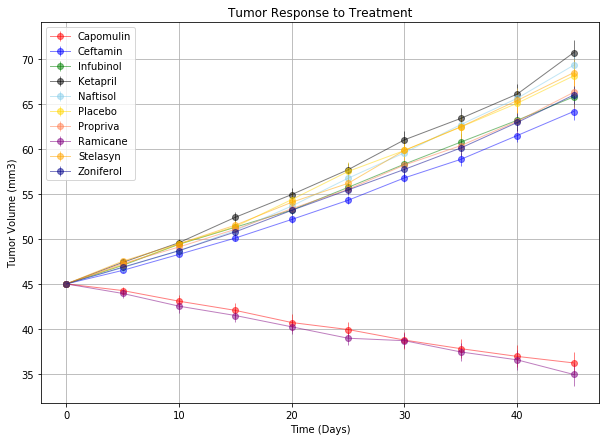

In [80]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,7))
plt.errorbar(tumorVolTab['Timepoint'], tumorVolTab['Capomulin'], tumorVolErrTab['Capomulin'], 
             marker ='o', color='red', label="Capomulin", alpha=0.5, linewidth=1.0)
plt.errorbar(tumorVolTab['Timepoint'], tumorVolTab['Ceftamin'], tumorVolErrTab['Ceftamin'], 
             marker ='o', color='blue', label="Ceftamin", alpha=0.5, linewidth=1.0)
plt.errorbar(tumorVolTab['Timepoint'], tumorVolTab['Infubinol'], tumorVolErrTab['Infubinol'], 
             marker ='o', color='green', label="Infubinol", alpha=0.5, linewidth=1.0)
plt.errorbar(tumorVolTab['Timepoint'], tumorVolTab['Ketapril'], tumorVolErrTab['Ketapril'], 
             marker ='o', color='black', label="Ketapril", alpha=0.5, linewidth=1.0)
plt.errorbar(tumorVolTab['Timepoint'], tumorVolTab['Naftisol'], tumorVolErrTab['Naftisol'], 
             marker ='o', color='skyblue', label="Naftisol", alpha=0.5, linewidth=1.0)
plt.errorbar(tumorVolTab['Timepoint'], tumorVolTab['Placebo'], tumorVolErrTab['Placebo'], 
             marker ='o', color='gold', label="Placebo", alpha=0.5, linewidth=1.0)
plt.errorbar(tumorVolTab['Timepoint'], tumorVolTab['Propriva'], tumorVolErrTab['Propriva'], 
             marker ='o', color='coral', label="Propriva", alpha=0.5, linewidth=1.0)
plt.errorbar(tumorVolTab['Timepoint'], tumorVolTab['Ramicane'], tumorVolErrTab['Ramicane'], 
             marker ='o', color='purple', label="Ramicane", alpha=0.5, linewidth=1.0)
plt.errorbar(tumorVolTab['Timepoint'], tumorVolTab['Stelasyn'], tumorVolErrTab['Stelasyn'], 
             marker ='o', color='orange', label="Stelasyn", alpha=0.5, linewidth=1.0)
plt.errorbar(tumorVolTab['Timepoint'], tumorVolTab['Zoniferol'], tumorVolErrTab['Zoniferol'], 
             marker ='o', color='darkblue', label="Zoniferol", alpha=0.5, linewidth=1.0)
plt.grid()
plt.legend()
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Save the Figure
plt.savefig('output/tumor_response_data.png')
plt.show()


In [82]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metaGrp = mouse_clin.groupby(['Drug', 'Timepoint'])
metaMean = metaGrp.mean()
metaMean = metaMean.reset_index()
del metaMean['Tumor Volume (mm3)']

# Convert to DataFrame
metaMean = pd.DataFrame(metaMean)

# Preview DataFrame
metaMean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [84]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metaErr = metaGrp.sem()
metaErr = metaErr.reset_index()
del metaErr['Tumor Volume (mm3)']
del metaErr['Mouse ID']

# Convert to DataFrame
metaErr = pd.DataFrame(metaErr)

# Preview DataFrame
metaErr.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [87]:
# Minor Data Munging to Re-Format the Data Frames
metaTab = pd.pivot_table( metaMean,
                                  index = metaMean['Timepoint'], 
                                  columns = ['Drug'], 
                                   values = ['Metastatic Sites'] )
metaTab.columns = metaTab.columns.droplevel()
metaTab = metaTab.reset_index()
metaErrTab = pd.pivot_table( metaErr,
                                  index = metaErr['Timepoint'], 
                                  columns = ['Drug'], 
                                   values = ['Metastatic Sites'] )
metaErrTab.columns = metaErrTab.columns.droplevel()
metaErrTab = metaErrTab.reset_index()

# Preview that Reformatting worked
metaTab.head()


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


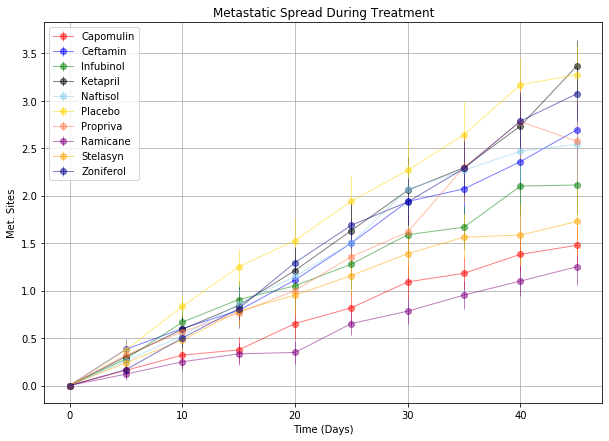

In [93]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,7))
plt.errorbar(metaTab['Timepoint'], metaTab['Capomulin'], metaErrTab['Capomulin'], 
             marker ='o', color='red', label="Capomulin", alpha=0.5, linewidth=1.0)
plt.errorbar(metaTab['Timepoint'], metaTab['Ceftamin'], metaErrTab['Ceftamin'], 
             marker ='o', color='blue', label="Ceftamin", alpha=0.5, linewidth=1.0)
plt.errorbar(metaTab['Timepoint'], metaTab['Infubinol'], metaErrTab['Infubinol'], 
             marker ='o', color='green', label="Infubinol", alpha=0.5, linewidth=1.0)
plt.errorbar(metaTab['Timepoint'], metaTab['Ketapril'], metaErrTab['Ketapril'], 
             marker ='o', color='black', label="Ketapril", alpha=0.5, linewidth=1.0)
plt.errorbar(metaTab['Timepoint'], metaTab['Naftisol'], metaErrTab['Naftisol'], 
             marker ='o', color='skyblue', label="Naftisol", alpha=0.5, linewidth=1.0)
plt.errorbar(metaTab['Timepoint'], metaTab['Placebo'], metaErrTab['Placebo'], 
             marker ='o', color='gold', label="Placebo", alpha=0.5, linewidth=1.0)
plt.errorbar(metaTab['Timepoint'], metaTab['Propriva'], metaErrTab['Propriva'], 
             marker ='o', color='coral', label="Propriva", alpha=0.5, linewidth=1.0)
plt.errorbar(metaTab['Timepoint'], metaTab['Ramicane'], metaErrTab['Ramicane'], 
             marker ='o', color='purple', label="Ramicane", alpha=0.5, linewidth=1.0)
plt.errorbar(metaTab['Timepoint'], metaTab['Stelasyn'], metaErrTab['Stelasyn'], 
             marker ='o', color='orange', label="Stelasyn", alpha=0.5, linewidth=1.0)
plt.errorbar(metaTab['Timepoint'], metaTab['Zoniferol'], metaErrTab['Zoniferol'], 
             marker ='o', color='darkblue', label="Zoniferol", alpha=0.5, linewidth=1.0)
plt.grid()
plt.legend()
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Met. Sites")

# Save the Figure
plt.savefig('output/meta_spread_data.png')
plt.show()


In [91]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouseCount = tumorGrp.count()
mouseCount = mouseCount.reset_index()
del mouseCount['Tumor Volume (mm3)']
del mouseCount['Metastatic Sites']

# Convert to DataFrame
mouseCount = pd.DataFrame(mouseCount)

# Preview DataFrame
mouseCount.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [92]:
# Minor Data Munging to Re-Format the Data Frames
mouseTab = pd.pivot_table( mouseCount,
                                  index = mouseCount['Timepoint'], 
                                  columns = ['Drug'], 
                                   values = ['Mouse ID'] )
mouseTab.columns = mouseTab.columns.droplevel()
mouseTab = mouseTab.reset_index()

# Preview that Reformatting worked
mouseTab.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


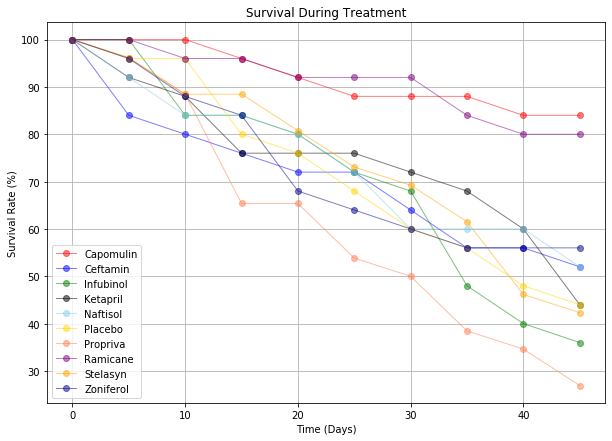

In [97]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(10,7))
plt.errorbar(mouseTab['Timepoint'], (mouseTab['Capomulin']/25)*100,  
             marker ='o', color='red', label="Capomulin", alpha=0.5, linewidth=1.0)
plt.errorbar(mouseTab['Timepoint'], (mouseTab['Ceftamin']/25)*100,  
             marker ='o', color='blue', label="Ceftamin", alpha=0.5, linewidth=1.0)
plt.errorbar(mouseTab['Timepoint'], (mouseTab['Infubinol']/25)*100, 
             marker ='o', color='green', label="Infubinol", alpha=0.5, linewidth=1.0)
plt.errorbar(mouseTab['Timepoint'], (mouseTab['Ketapril']/25)*100, 
             marker ='o', color='black', label="Ketapril", alpha=0.5, linewidth=1.0)
plt.errorbar(mouseTab['Timepoint'], (mouseTab['Naftisol']/25)*100, 
             marker ='o', color='skyblue', label="Naftisol", alpha=0.5, linewidth=1.0)
plt.errorbar(mouseTab['Timepoint'], (mouseTab['Placebo']/25)*100, 
             marker ='o', color='gold', label="Placebo", alpha=0.5, linewidth=1.0)
plt.errorbar(mouseTab['Timepoint'], (mouseTab['Propriva']/26)*100,  
             marker ='o', color='coral', label="Propriva", alpha=0.5, linewidth=1.0)
plt.errorbar(mouseTab['Timepoint'], (mouseTab['Ramicane']/25)*100, 
             marker ='o', color='purple', label="Ramicane", alpha=0.5, linewidth=1.0)
plt.errorbar(mouseTab['Timepoint'], (mouseTab['Stelasyn']/26)*100, 
             marker ='o', color='orange', label="Stelasyn", alpha=0.5, linewidth=1.0)
plt.errorbar(mouseTab['Timepoint'], (mouseTab['Zoniferol']/25)*100, 
             marker ='o', color='darkblue', label="Zoniferol", alpha=0.5, linewidth=1.0)
plt.grid()
plt.legend()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# Save the Figure
plt.savefig('output/survival_data.png')

# Show the Figure
plt.show()

In [117]:
# Calculate the percent changes for each drug
drugGrp = mouse_clin.groupby('Drug')
drugGrp = drugGrp.mean()
drugGrp = drugGrp.reset_index()
del drugGrp['Tumor Volume (mm3)']
del drugGrp['Metastatic Sites']
del drugGrp['Timepoint']
tumorChg = []
i = 1
while i < 11:
    tumorChg.append(((tumorVolTab.iat[9, i] - tumorVolTab.iat[0, i])/45)*100) 
    i = i + 1
drugGrp['Tumor Change(%)'] = tumorChg

# Display the data to confirm
drugGrp


,Drug,Tumor Change(%)
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


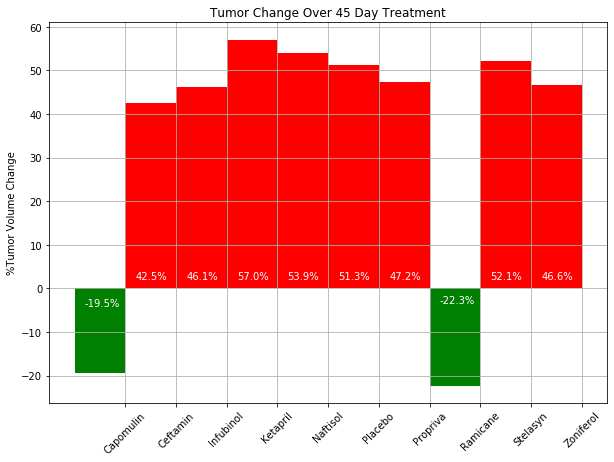

In [187]:
# Store all Relevant Percent Changes into a Tuple
x_axis = np.arange(len(drugGrp['Drug']))
changes = drugGrp['Tumor Change(%)']

# Splice the data between passing and failing drugs
plt.figure(figsize=(10, 7))
for drug, change in zip(x_axis, changes):
    if change > 0:
        plt.bar(drug, change, color='red', align="edge", width=1)
    elif change < 0:
        plt.bar(drug, change, color='green', align="edge", width=1)
        
# Orient widths. Add labels, tick marks, etc.
plt.grid()
tick_locations = [value+1 for value in x_axis]
plt.xticks(tick_locations, drugGrp['Drug'], rotation=45)
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("%Tumor Volume Change")

# Use functions to label the percentages of changes
# Call functions to implement the function calls
for i, v in enumerate(changes):
    if v > 0:
        plt.text(i+0.2, i/changes[i]+2, str(changes[i].round(1))+'%', color='white')
    elif v < 0:
        plt.text(i+0.2, (i/changes[i]+2)*(-2), str(changes[i].round(1))+'%', color='white')

# Save the Figure
plt.savefig('output/pct_tumor_data.png')

# Show the Figure
plt.show()